In [1]:
import os
from skimage import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
#globbing utility.
import glob
from scipy.spatial import distance
import scipy
import operator
from skimage import feature
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

### resize the image

In [2]:
def resize(img):
    img_resized=cv2.resize(img,(16,16))
    img_flatt=(img_resized.flatten())/255
    return img_flatt

### euclidien distance between 2 images

In [3]:
# Calcule de distance
def distance_eucl(imgs, query, q):

    n=imgs.shape[0]
    dist = []
    for i in range (n):
        dist.append(distance.euclidean(resize(query[q]),resize(imgs[i])))
        
    return dist

### import the queries and the images 

In [4]:
def import_query_img():    
    images = os.listdir("C:/Users/User/Downloads/anciens_S2/ImageRetrieval/smallholidays")
    
    
    imgs = []
    query = []
    filenames_q = []
    filenames_i = []
    
    for i in range (len(images)):
        D = open("C:/Users/User/Downloads/anciens_S2/ImageRetrieval/smallholidays/%s" %images[i],'rb')
        filename, file_extension = os.path.splitext(images[i])
        
        suffix =00''
        if filename.endswith(suffix) == True:
            filenames_q.append(filename)
            img=io.imread(D)
            query.append(img)
        else:
            filenames_i.append(filename)
            img=io.imread(D)
            imgs.append(img)
            
    Image = np.copy(imgs) 
    Query = np.copy(query)
    
    return Image,Query,filenames_q,filenames_i



img,quer,fileq,filei=import_query_img()


In [5]:
##resize of images !! 
img_resize=[]
quer_resize=[]
for i in range(len(img)):
    img_resize.append(resize(img[i]))
for j in range(len(quer)):
    quer_resize.append(resize(quer[j]))

### return the "nbr" ranked images for a given query

In [7]:
def highest_scores(query,Images,Queries,nbr,filenames_i):
    scores=distance_eucl(Images, Queries, query)
    result=zip(filenames_i,scores)
    high_scores = sorted(result, key=operator.itemgetter(1), reverse=False)[:nbr]
    
    return high_scores

return the 10 ranked images for the 4 query

In [8]:
h=highest_scores(4,img,quer,10,filei)


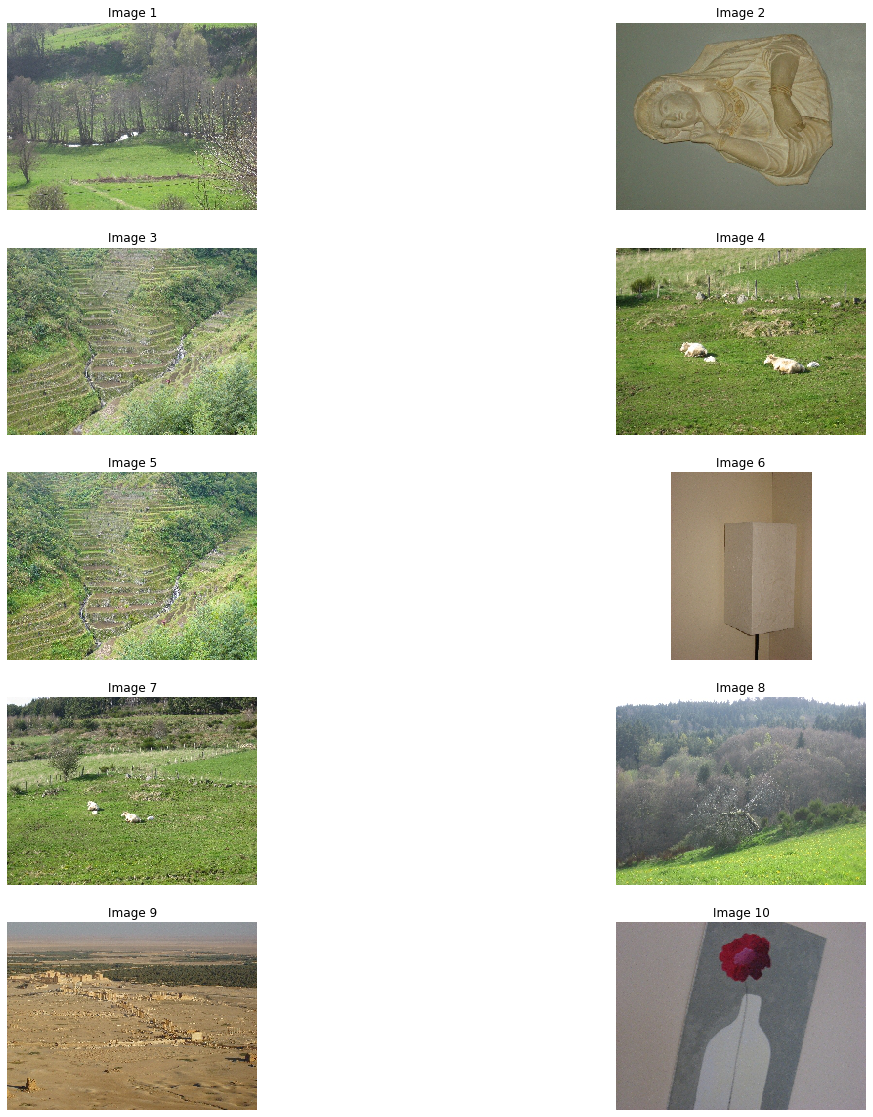

In [9]:
##print the 10 ranked images    
for i in range (len(h)):

    # Afficher les images pertinantes
    plt.figure(2, figsize=(20,20))
    plt.subplot(5,2,i+1)
    plt.title('Image %i' %(i+1))
    plt.imshow(img[filei.index(h[i][0])])
    plt.axis('off')
plt.show() 

### find the relevant image in the database

In [10]:
##find the relevant image in the data base given a query
def find_relevant_images(q,filei,fileq):
    relevant_image_ofaquery=[]
    
    for i in range(len(filei)):
        if fileq[q][0:5] in filei[i]:
            relevant_image_ofaquery.append(filei[i])
        i+=1
    return relevant_image_ofaquery

### calculate the precison and the recall 

In [11]:
def Precision_Recall(relevant_image_ofaquery,h) :
    P=[]
    R=[]
    relevant=np.zeros(10)
    for i in range(len(h)):
        if h[i][0] in relevant_image_ofaquery:
            relevant[i]=1
        R.append(sum(relevant)/len(relevant_image_ofaquery))
        P.append(sum(relevant)/(i+1))
    
    P=np.asarray(P)
    ind=np.where(relevant==1)
    AP=sum(P[list(ind[0])])/len(relevant_image_ofaquery)
    
    return R,P,AP

### compute the performance of IR system for the 500 queries and compute the mAP

In [12]:
##all queries !
def mAP_queries(img,quer,filei,fileq,nb):
    mAP=[]
    file=open("myresults_allqueries.dat","w+")
    for l in range(len(quer)):
        ranking=highest_scores(l, img, quer, nb, filei)
        relevant_img=find_relevant_images(l,filei,fileq)
        Recall,Precision,AV_precision=Precision_Recall(relevant_img,ranking)
        mAP.append(AV_precision)
    
        file.write("result_line= "+fileq[l]+'.jpg  rank0 '+ranking[0][0]+'jpg rank1 '+ranking[1][0]+'.jpg rank2 '+ranking[2][0]+'.jpg rank3 '
                   +ranking[3][0]+'.jpg rank4 '+ranking[4][0]+'.jpg rank5 '+ranking[5][0]+'.jpg rank6 '+ranking[6][0]+'.jpg rank7 '
                   +ranking[7][0]+'.jpg rank8 '+ranking[8][0]+'.jpg rank9 '+ranking[9][0]+'.jpg')
        file.write("\n")
    print("mAP for the 500 queries:" ,(sum(mAP)/len(quer)))
    
    return (sum(mAP)/len(quer))

mAP for 10 retrieved images

In [53]:
mAP_queries(img,quer,filei,fileq,10)

mAP for the 500 queries: 0.201220740740741


0.201220740740741

mAP for 1 retrieved image

In [16]:
mAP=[]
nb=1
file=open("myresults_allqueries1.dat","w+")
for l in range(len(quer)):
    ranking=highest_scores(l, img, quer, nb, filei)
    relevant_img=find_relevant_images(l,filei,fileq)
    Recall,Precision,AV_precision=Precision_Recall(relevant_img,ranking)
    mAP.append(AV_precision)
    file.write("result_line= "+fileq[l]+'.jpg  rank0 '+ranking[0][0]+'jpg')
    file.write("\n")
print("mAP for the 500 queries:" ,(sum(mAP)/len(quer)))

mAP for the 500 queries: 0.13512777777777782


mAP for 5 retrieved images

In [18]:
mAP=[]
nb=5
file=open("myresults_allqueries.dat","w+")
for l in range(len(quer)):
    ranking=highest_scores(l, img, quer, nb, filei)
    relevant_img=find_relevant_images(l,filei,fileq)
    Recall,Precision,AV_precision=Precision_Recall(relevant_img,ranking)
    mAP.append(AV_precision)
    
    file.write("result_line= "+fileq[l]+'.jpg  rank0 '+ranking[0][0]+'jpg rank1 '+ranking[1][0]+'.jpg rank2 '+ranking[2][0]+'.jpg rank3 '
                   +ranking[3][0]+'.jpg rank4 '+ranking[4][0]+'.jpg')
    file.write("\n")
print("mAP for the 500 queries:" ,(sum(mAP)/len(quer)))

mAP for the 500 queries: 0.18785592592592598


### LOCAL BINARY PATTERNS DESCRIPTOR

In [20]:
##LBP
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        
        return hist

desc = LocalBinaryPatterns(24, 8)


In [21]:
def LBP_hist(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)

    return hist

In [47]:
def cdist(imgs, query, q):

    n=imgs.shape[0]
    dist = []
    for i in range (n):
        dist.append(distance.euclidean(LBP_hist(query[q]),LBP_hist(imgs[i])))
        
    return dist

In [45]:
def highest_scores_lbp(query,Images,Queries,nbr,filenames_i):
    scores=cdist(Images, Queries, query)
    result=zip(filenames_i,scores)
    high_scores = sorted(result, key=operator.itemgetter(1), reverse=False)[:nbr]
    
    return high_scores

In [51]:
mAP=[]
nb=10
for l in range(10):
    ranking=highest_scores_lbp(l, img, quer, nb, filei)
    relevant_img=find_relevant_images(l,filei,fileq)
    Recall,Precision,AV_precision=Precision_Recall(relevant_img,ranking)
    mAP.append(AV_precision)
    print("result_line= "+fileq[l]+'.jpg  rank0 '+ranking[0][0]+'jpg rank1 '+ranking[1][0]+'.jpg rank2 '+ranking[2][0]+'.jpg rank3 '
                   +ranking[3][0]+'.jpg rank4 '+ranking[4][0]+'.jpg')
print("mAP for the 500 queries:" ,(sum(mAP)/10))

result_line= 100000.jpg  rank0 126803jpg rank1 126201.jpg rank2 142301.jpg rank3 132302.jpg rank4 108902.jpg
result_line= 100100.jpg  rank0 100101jpg rank1 123901.jpg rank2 122402.jpg rank3 124402.jpg rank4 122401.jpg
result_line= 100200.jpg  rank0 135703jpg rank1 133801.jpg rank2 146102.jpg rank3 120501.jpg rank4 147603.jpg
result_line= 100300.jpg  rank0 100301jpg rank1 144902.jpg rank2 100302.jpg rank3 144804.jpg rank4 114601.jpg
result_line= 100400.jpg  rank0 147401jpg rank1 138012.jpg rank2 148202.jpg rank3 135301.jpg rank4 135802.jpg
result_line= 100500.jpg  rank0 132302jpg rank1 108902.jpg rank2 104401.jpg rank3 126201.jpg rank4 126803.jpg
result_line= 100600.jpg  rank0 145301jpg rank1 103204.jpg rank2 113801.jpg rank3 121403.jpg rank4 125202.jpg
result_line= 100700.jpg  rank0 126002jpg rank1 125102.jpg rank2 146203.jpg rank3 104901.jpg rank4 134801.jpg
result_line= 100800.jpg  rank0 100801jpg rank1 132511.jpg rank2 114402.jpg rank3 137301.jpg rank4 138307.jpg
result_line= 100900

## BOVW

In [ ]:
def sift_features(images):
    features = []

    descriptor_list = []
    sift = cv2.xfeatures2d.SIFT_create()
    for image in images:
        kp, des = sift.detectAndCompute(image,None)
           
            
        descriptor_list.extend(des)
        features.append(des)
    return descriptor_list, features

In [ ]:
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words
    
# Takes the central points which is visual words    
visual_words = kmeans(150, descriptor_list) 

In [ ]:
def image_histogram(features, visual_words,img):
    histogram = np.zeros(len(centers))
    for each_feature in img:
        ind = find_index(each_feature, centers)
        histogram[ind] += 1
    return histogram

find another 10 similar images from the dataset for a given query using the nearestNeighbors

In [ ]:
query = cv2.imread(quer[4])
data = gray(query)
features, descriptor = sift_features(images)
histogram = image_histogram(features, visual_words,images)
neighbor = NearestNeighbors(n_neighbors = 10)
neighbor.fit(preprocess_image)
dist, result = neighbor.kneighbors([histogram])